![pydatalogo](https://user-images.githubusercontent.com/7065401/46249227-f76b1d80-c3fb-11e8-931e-8a9adc12bd4e.png)

<div style="color: #444; text-align: center;">
    <b>Córdoba 2018</b>
    <br>
    <span>Matías Caputti</span>
</div>

---

# Object recognizer

Import necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

## Deep network - MobileNet model

Let's create a deep network which will learn our emotions and then will try to predict them.

MobileNet is essentially a streamlined version of the Xception architecture optimized for mobile applications.

_https://arxiv.org/abs/1704.04861_

In [2]:
from keras.applications import mobilenet

model = mobilenet.MobileNet(weights='imagenet')

model.summary()

# we won't train that already trained model!

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

### Predict using our model

Finally test the model with some photos:

[('n02992529', 'cellular_telephone', 0.98390585),
 ('n03584254', 'iPod', 0.0076883147),
 ('n03666591', 'lighter', 0.0060443208)]

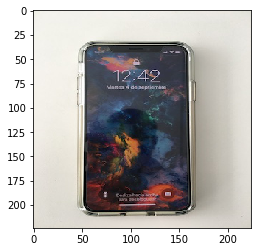

In [3]:
from PIL import Image
from keras import preprocessing

#img = Image.open('./data/phone.jpg')
img = preprocessing.image.load_img('./data/phone.jpg', target_size=(224,224))
plt.imshow(img)

x = preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = mobilenet.preprocess_input(x)
predictions = model.predict(x)
labels = mobilenet.decode_predictions(predictions, top=3)[0]

labels

[('n07753275', 'pineapple', 0.99998116),
 ('n07745940', 'strawberry', 1.346065e-05),
 ('n07760859', 'custard_apple', 1.0337626e-06)]

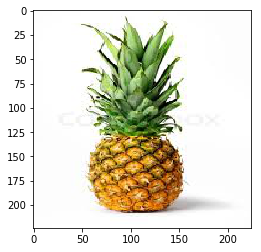

In [4]:
img = preprocessing.image.load_img('./data/pinapple.jpg', target_size=(224,224))
plt.imshow(img)

x = preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = mobilenet.preprocess_input(x)
predictions = model.predict(x)
labels = mobilenet.decode_predictions(predictions, top=3)[0]

labels

We can also download an image from Internet. In this example we'll get images from https://imgur.com/.

We https://i.imgur.com/XXXXXXX.jpg, so we'll take only the **UNIQUE_ID** of the photo and pass it to our _download_img_from_imgur_ function as follows:

In [5]:
import requests

def download_img_from_imgur(unique_id='eF15hgi'):
    img = requests.get('https://i.imgur.com/{}m.jpg'.format(unique_id))
    decoded = cv2.imdecode(np.frombuffer(img.content, np.uint8), -1)
    bgr2rgb = cv2.cvtColor(decoded, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(bgr2rgb, (224, 224))
    
    return resized

[('n02437616', 'llama', 0.25696546),
 ('n03868242', 'oxcart', 0.162082),
 ('n03538406', 'horse_cart', 0.15789808)]

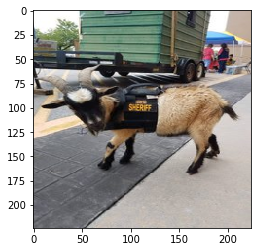

In [6]:
img = download_img_from_imgur()
plt.imshow(img)

x = preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = mobilenet.preprocess_input(x)
predictions = model.predict(x)
labels = mobilenet.decode_predictions(predictions, top=3)[0]

labels

[('n02099601', 'golden_retriever', 0.8434833),
 ('n02086079', 'Pekinese', 0.028659362),
 ('n02111500', 'Great_Pyrenees', 0.023921141)]

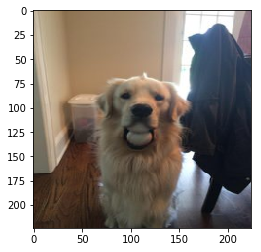

In [7]:
img = download_img_from_imgur('XgbZdeA')
plt.imshow(img)

x = preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = mobilenet.preprocess_input(x)
predictions = model.predict(x)
labels = mobilenet.decode_predictions(predictions, top=3)[0]

labels

---
## Your assignment!

- Now take your own photo with a mobile phone, computer camera.
- Upload it to https://imgur.com/ and take its **UNIQUE_ID**.
- Load it into this Notebook and make a prediction using _Inception v3_.

In [8]:
# your code goes here...


<img src="https://camo.githubusercontent.com/53f6fb6ccefefd87dc93af20b8e7972573de9828/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f33393131393531382d35396661353163652d343665632d313165382d383530332d3566383133363535386632622e706e67">

<a href="https://rmotr.com" target="_blank"><img src="https://camo.githubusercontent.com/cc5541fa8bc6f822cb8d5b4261a23f20ec8321f4/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f33393131393438362d34373138653338362d343665632d313165382d396663332d3532353061343965663537302e706e67">
</a>